In [1]:
import random
import math
import numpy as np
import pandas as pd
from math import sqrt as sqrt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from statsmodels.tsa.api import SARIMAX

import scipy.stats as stats

import copulae

from proj_1 import *


In [2]:
no_params = False

# generating simulation data 

In [3]:
#generated data from r 
y_sim= pd.read_csv("clayton_norm_norm_data.csv")
y_sim = y_sim[["V1", "V2"]]
y1t_sim = y_sim["V1"]
y2t_sim = y_sim["V2"]

y_sim = y_sim.to_numpy()


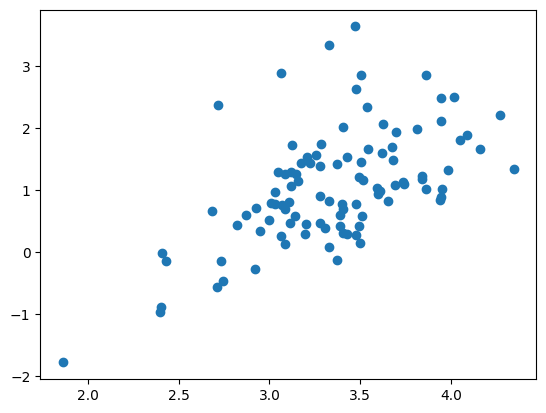

In [4]:
plt.scatter(y1t_sim, y2t_sim)

playing with libraries 

In [5]:
cop = copulae.archimedean.ClaytonCopula() #dim = 2 == default
cop.fit(y_sim)
print(cop.summary())

#import sys, traceback
#traceback.print_stack()

Clayton Copula Summary
Clayton Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.3737384249753615



In [6]:
# Transform to uniform marginals
U_1t_sim = stats.norm.cdf(y1t_sim, 3.5, 0.5)
U_2t_sim = stats.norm.cdf(y2t_sim, 1.2, 1)
U_1t_sim, U_2t_sim

data_sim = pd.DataFrame(U_1t_sim, columns = ["U_1t_sim"])
data_sim["U_2t_sim"] = U_2t_sim
data_sim = data_sim.to_numpy()


In [7]:
cop = copulae.archimedean.ClaytonCopula() #dim = 2 == default
cop.fit(data_sim)
print(cop.summary())
print(cop.log_lik(data_sim))

Clayton Copula Summary
Clayton Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.3737384249753615

26.259336664532768


In [8]:
##requires marginal data 
#
#from copulas.bivariate import Clayton
#copula = Clayton()
#copula.fit(data_sim)
#copula.compute_theta()
#copula.tau
#copula.theta

In [9]:
from statsmodels.distributions.copula.api import ClaytonCopula
cop = ClaytonCopula()
cop.fit_corr_param(data_sim)

1.252299605781866

In [10]:
from scipy import stats
tau = stats.kendalltau(data_sim[:,0], data_sim[:,1])[0]
tau
2 * tau / (1 - tau)

1.252299605781866

In [11]:
#my fn 

#def theta_to_exp(theta):
#    return math.exp(theta)
#
#def exp_to_theta(exp):
#    return math.log(exp)
#
#def neg_log_clayton_pdf(theta, u, v):
#    
#    theta = theta_to_exp(theta)
#    print(theta)
#    #return -1* np.log((1 + theta) * (u@v) **(-1-theta) * np.sum((u ** (-theta) + v**(-theta) -1) **-((2*theta + 1)/theta))) 
#    print( -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(u**(-theta) + v**(-theta) -1 )) ))
#    return -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(u**(-theta) + v**(-theta) -1 )) )

In [12]:
#pseudo obs - empirical pdf 

#from scipy.stats import rankdata
#rd1 = rankdata(data_sim[:,0])/101 
#rd2 = rankdata(data_sim[:,1])/101 

In [13]:
inita = 2 * tau / (1 - tau) #exp_to_theta(1.3737384249753615)

In [14]:
#from copulas
#ptim_options {'options': {'maxiter': 20000, 'disp': False, 'xatol': 0.0001, 'fatol': 0.0001}, 'method': 'Nelder-Mead'}

#can use tau as first value 
results = minimize(neg_log_clayton_pdf, [inita], args = ((data_sim[:,0], data_sim[:,1])), method = "Nelder-Mead", options= {'maxiter': 20000, 'disp': False, 'xatol': 0.0001, 'fatol': 0.0001})
#results = minimize(neg_log_clayton_pdf, [inita], args = ((rd1, rd2)), method = "Nelder-Mead", options= {'maxiter': 20000, 'disp': False, 'xatol': 0.0001, 'fatol': 0.0001})
results

results.x

theta [1.25229961]
neg log clayton -29.020347067937813
theta [1.31491459]
neg log clayton -29.162626382952563
theta [1.37752957]
neg log clayton -29.223724607526105
theta [1.44014455]
neg log clayton -29.206072446654538
theta [1.44014455]
neg log clayton -29.206072446654566
theta [1.40883706]
neg log clayton -29.224594190445757
theta [1.44014455]
neg log clayton -29.2060724466545
theta [1.39318331]
neg log clayton -29.226601604383298
theta [1.37752957]
neg log clayton -29.223724607526123
theta [1.40101018]
neg log clayton -29.226206148684405
theta [1.38535644]
neg log clayton -29.225775963015842
theta [1.39709675]
neg log clayton -29.226556225983863
theta [1.38926988]
neg log clayton -29.226341708868215
theta [1.39514003]
neg log clayton -29.226617038451696
theta [1.39709675]
neg log clayton -29.226556225983863
theta [1.39416167]
neg log clayton -29.226618856727466
theta [1.39318331]
neg log clayton -29.226601604383262
theta [1.39465085]
neg log clayton -29.226620330855212
theta [1.395

array([1.39452856])

# real data

need to be passing u1t and u2t

which are  cdf (normcdf) ( y1t ; B0 + B1 * yt-1 : sigma) for all time steps 

so need to calculate the mean (coefficients * lags)

0       0.298868
1       0.558297
2       0.757915
3       0.830085
4       0.798748
          ...   
2915    0.547024
2916    0.598445
2917    0.710799
2918    0.803563
2919    0.833237
Name: U_1t_sim, Length: 2920, dtype: float64 0       0.076631
1       0.521159
2       0.506615
3       0.423293
4       0.994635
          ...   
2915    0.158522
2916    0.324060
2917    0.520353
2918    0.450322
2919    0.402664
Name: U_2t_sim, Length: 2920, dtype: float64


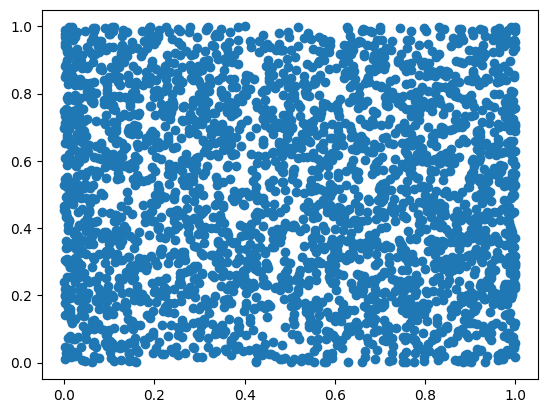

U_1t         U_2t
count  2920.000000  2920.000000
mean      0.500246     0.498908
std       0.311251     0.284602
min       0.000008     0.000226
25%       0.220164     0.255278
50%       0.504895     0.493516
75%       0.779086     0.745525
max       0.999971     0.999906

In [15]:
U_1t = pd.read_csv("U_1t.csv")
U_1t = U_1t["U_1t_sim"]
U_2t = pd.read_csv("U_2t.csv")
U_2t = U_2t[20:2940] #to make same length
U_2t.reset_index(inplace = True)
U_2t = U_2t["U_2t_sim"]
print(U_1t, U_2t)
plt.scatter(U_1t, U_2t)
plt.show()
data = pd.DataFrame({"U_1t" : U_1t, "U_2t" : U_2t})
display(data.describe())
data = data.to_numpy()

# Copula library comparisons 

In [16]:
cop = copulae.archimedean.ClaytonCopula() #dim = 2 == default
cop.fit(data)
print(cop.summary())
print(cop.log_lik(data))

Clayton Copula Summary
Clayton Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : -0.030338713404126263

1.394622705649688


In [17]:
#errors for negative theta

#from copulas.bivariate import Clayton
#copula = Clayton()
#copula.fit(data)
#copula.compute_theta()
#copula.tau
#copula.theta

In [18]:
from scipy import stats
tau = stats.kendalltau(data[:,0], data[:,1])[0]
tau
2 * tau / (1 - tau)

-0.04623042042533528

In [19]:
#from statsmodels.distributions.copula.api import ClaytonCopula
#cop = ClaytonCopula(theta = 2 * tau / (1 - tau) )
#cop.fit_corr_param(data)
#cop.logpdf(data).sum()

In [20]:
#def neg_log_clayton_pdf(theta, u, v):
#    #theta = theta_to_exp(theta)
#    print("theta", theta)
#
#    #return -1* np.log((1 + theta) * (u@v) **(-1-theta) * np.sum((u ** (-theta) + v**(-theta) -1) **-((2*theta + 1)/theta))) 
#    if theta >0:
#        print("neg log clayton", -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(u**(-theta) + v**(-theta) -1 )) ))
#        return -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(u**(-theta) + v**(-theta) -1 )) )
#    
#    else:
#        print("neg log clayton b", -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(- 1* ( -1*(u**(-theta)-1) + -1*(v**(-theta)-1)  ) +1 ) ) ))
#        return -1 *np.sum(( np.log(theta + 1) - (theta + 1) * ( np.log(u) + np.log(v)) - ((2*theta + 1)/theta) * np.log(- 1* ( -1*(u**(-theta)-1) + -1*(v**(-theta)-1)  ) +1 ) ) )

need to deal with neg case for theta

In [21]:
inita = 2 * tau / (1 - tau) #sq_to_theta

#results = minimize(neg_log_clayton_pdf, [inita], args = ((rd1, rd2)), method = "nelder-mead")
results = minimize(neg_log_clayton_pdf, x0 = [inita], args = ((data[:,0], data[:,1])), method = "L-BFGS-B")

theta [-0.04623042]
neg log clayton b 0.09106029394120174
theta [-0.04623041]
neg log clayton b 0.09105892115112368
theta [0.95376958]
neg log clayton 923.9899935104412
theta [0.95376959]
neg log clayton 923.9900085878013
theta [-0.0006495]
neg log clayton b -0.07152780126032435
theta [-0.00064949]
neg log clayton b -0.07152671360996982
theta [-0.02079878]
neg log clayton b -1.3536202748857065
theta [-0.02079877]
neg log clayton b -1.3536201207518315
theta [-0.02412565]
neg log clayton b -1.3761858685408321
theta [-0.02412564]
neg log clayton b -1.3761858880908129
theta [-0.02375117]
neg log clayton b -1.376545582495242
theta [-0.02375116]
neg log clayton b -1.3765455821710835
theta [-0.02375728]
neg log clayton b -1.3765456819048572
theta [-0.02375727]
neg log clayton b -1.3765456819037176
theta [-0.0237573]
neg log clayton b -1.376545681905434
theta [-0.02375729]
neg log clayton b -1.376545681905624


prediction


rnv from copulas or anylibrary, with ourtheta, and same from matlab        


compared copulas, statsmodel and copularnd (matlab) all looking like pretty similar results, 

will use statsmodels 

Clayton Copula Summary
Clayton Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : -0.030338713404126263



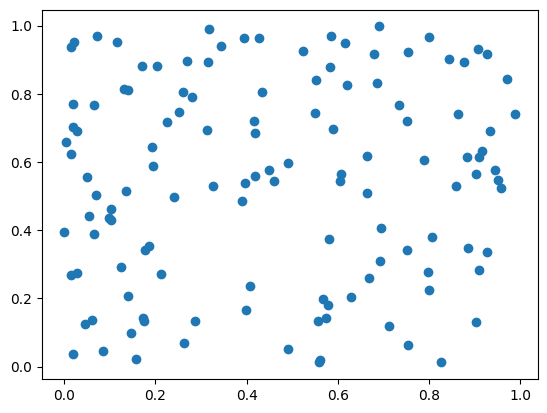

In [22]:
cop = copulae.archimedean.ClaytonCopula() #dim = 2 == default
cop.fit(data)
print(cop.summary())
u_gen = cop.random(125, seed = 1)

plt.scatter(u_gen[:,0], u_gen[:,1])

- #from statsmodel libraries, for dim = 2
- v = stats.gamma(1. / th).rvs(size=(nobs, 1), random_state=rng)
- rv = self.transform.inverse(- np.log(x) / v, th)


In [23]:
#doesnt like negatives 

#from statsmodels.distributions.copula.api import ClaytonCopula
#cop = ClaytonCopula(results.x) 
#cop.fit_corr_param(data)
#cop.logpdf(data).sum()
#u_gen = cop.rvs(125, random_state = 1)
#plt.scatter(u_gen[:,0], u_gen[:,1])

generating errors from u_gen

inverse normal cdf of the values

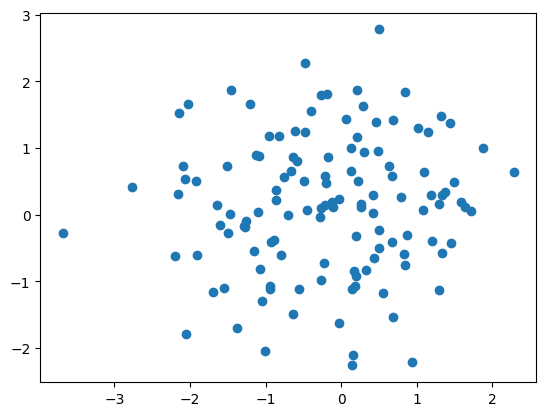

In [24]:
e_1t = stats.norm.ppf(u_gen[:,0])
e_2t = stats.norm.ppf(u_gen[:,1])
plt.scatter(e_1t, e_2t)

prediction 

y1t+1 = phi1t. * yt + sigma1 e1(t) (can gen 10000 e1t to get a predictive dist of y1t + 1) and take the mean and continue 

In [25]:
u_gen = cop.random(10000, seed = 1)
e_1t = stats.norm.ppf(u_gen[:,0])
e_2t = stats.norm.ppf(u_gen[:,1])

ar stuff

In [26]:
p1 = 40
y1 = pd.read_csv("rollpred_postfilter.csv")
y1 = y1["x"]
N1 = len(y1)

X_temp = pd.DataFrame()#0,index = range(0,N-p), columns = col)
for i in range(p1-1,0-1,-1):
    X1 = y1[(i):(N1-p1+i)]
    X_temp["lag"+str(p1-i)] = list(X1) #has memory of its index 
X1 = X_temp.to_numpy()
y1 = np.array(y1[p1:N1])

sarimax_mod1 = SARIMAX(y1, order=(p1, 0, 0), trend="n")
sarimax_res1 = sarimax_mod1.fit()
print(sarimax_res1.summary())

if no_params: 
    seed = 1416
    np.random.seed(seed)
    param_i = [np.random.uniform() for i in range(p1+1)]
    #param_i = [0.1 for i in range(p1+1)]
else:
    sarimax_params1 = sarimax_res1.arparams
    results_as_html = sarimax_res1.summary().tables[1].as_html()
    res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
    sarimax_sig1 = list(res_pd["coef"])[-1]
    #sarimax_sig1 = np.var(sarimax_res1.resid)
    non_restricted1 = np.arctanh(ARToPacf(sarimax_params1))
    param_i = list(non_restricted1) + [sq_to_sigma2(sarimax_sig1)]
    

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2960
Model:              SARIMAX(40, 0, 0)   Log Likelihood                4383.940
Date:                Sat, 27 Jul 2024   AIC                          -8685.880
Time:                        01:32:29   BIC                          -8440.169
Sample:                             0   HQIC                         -8597.438
                               - 2960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3490      0.352      0.991      0.322      -0.342       1.040
ar.L2          1.0110      0.898      1.126      0.260      -0.749       2.771
ar.L3          0.0607      1.363      0.045      0.9

C:\Users\danie\AppData\Local\Temp\ipykernel_25896\1847797654.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [27]:
results1 = minimize(neg_log_lik, param_i, args = ((y1, X1)), method = "L-BFGS-B")

#prediction fn
phi1_approx = barndorff_schou_transformation(np.tanh(results1.x[0:p1]))
#phi_approx = sarimax_res.arparams #to test fitting fn 
sigma21_approx = sigma2_to_sq(results1.x[-1])
#phi_approx = sarimax_res.arparams #to test fitting fn 
forecast_param1 = predicting_values(y1, p1, N1, phi1_approx, forecast_len = 125)

[ 0.34903512  1.0109916   0.06067097 -0.6530993  -0.38602904 -0.11626437
 -0.01030827  0.03968919  0.0835104   0.09654485  0.03170041 -0.10356826
 -0.21488817 -0.2138388  -0.11165632  0.01045094  0.08994821  0.10609341
  0.04331774 -0.08394578 -0.18580027 -0.17998884 -0.08713326  0.02069459
  0.09657068  0.11264357  0.05847548 -0.03535319 -0.1110849  -0.13284912
 -0.09706481 -0.01988885  0.07105086  0.1388306   0.13774317  0.02530869
 -0.1642222  -0.18660265  0.03197447  0.15354805] 0.0035 -4384.37789434247
[ 0.34903512  1.0109916   0.06067097 -0.6530993  -0.38602904 -0.11626437
 -0.01030826  0.03968919  0.0835104   0.09654485  0.03170041 -0.10356826
 -0.21488817 -0.2138388  -0.11165632  0.01045094  0.08994821  0.10609341
  0.04331774 -0.08394578 -0.18580027 -0.17998884 -0.08713326  0.02069459
  0.09657068  0.11264357  0.05847549 -0.03535319 -0.1110849  -0.13284912
 -0.09706481 -0.01988885  0.07105086  0.1388306   0.13774317  0.02530869
 -0.1642222  -0.18660265  0.03197447  0.15354805]

In [28]:
y2 = pd.read_csv("heave_postfilter.csv", header = None)
y2 = y2[0]
p2 = 30
N2 = len(y2)

X_temp = pd.DataFrame()#0,index = range(0,N-p), columns = col)
for i in range(p2-1,0-1,-1):
    X2 = y2[(i):(N2-p2+i)]
    X_temp["lag"+str(p2-i)] = list(X2) #has memory of its index 
X2 = X_temp.to_numpy()
y2 = np.array(y2[p2:N2])

sarimax_mod2 = SARIMAX(y2, order=(p2, 0, 0), trend="n")
sarimax_res2 = sarimax_mod2.fit()
print(sarimax_res2.summary())

if no_params: 
    seed = 14161 
    np.random.seed(seed)
    param_i = [np.random.uniform() for i in range(p2+1)]
    #param_i = [0.1 for i in range(p2+1)]
else:
    sarimax_params2 = sarimax_res2.arparams
    results_as_html = sarimax_res2.summary().tables[1].as_html()
    res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
    sarimax_sig2 = list(res_pd["coef"])[-1]
    #sarimax_sig2 = np.var(sarimax_res2.resid)
    non_restricted2 = np.arctanh(ARToPacf(sarimax_params2))
    param_i = list(non_restricted2) + [sq_to_sigma2(sarimax_sig2)]

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2970
Model:              SARIMAX(30, 0, 0)   Log Likelihood               15408.396
Date:                Sat, 27 Jul 2024   AIC                         -30754.792
Time:                        01:32:53   BIC                         -30568.906
Sample:                             0   HQIC                        -30687.895
                               - 2970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          6.6177      0.014    466.049      0.000       6.590       6.645
ar.L2        -19.9481      0.091   -218.399      0.000     -20.127     -19.769
ar.L3         34.2665      0.277    123.791      0.0

C:\Users\danie\AppData\Local\Temp\ipykernel_25896\3576718592.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [29]:
results2 = minimize(neg_log_lik, param_i, args = ((y2, X2)), method = "L-BFGS-B")

#prediction fn
phi2_approx = barndorff_schou_transformation(np.tanh(results2.x[0:p2]))
#phi2_approx = sarimax_res.arparams #to test fitting fn 
sigma22_approx = sigma2_to_sq(results2.x[-1])
forecast_param2 = predicting_values(y2, p2, N2, phi2_approx, forecast_len = 125)

[  6.6176607  -19.94810215  34.26653395 -32.8825524    9.7835038
  14.14647663 -13.29672443  -5.90470666  12.92521901   0.6714852
 -10.64600231   2.36851047   6.94890899  -1.73257139  -5.7624764
   1.09581638   6.08006779  -2.03549101  -5.54884095   2.7682463
   5.63471969  -5.83889712  -1.69564489   5.02417953  -0.11658895
  -5.75754243   6.55306958  -3.73662275   1.17495724  -0.16688646] 1.771e-06 -15455.316565476587
[  6.6176607  -19.94810217  34.26653399 -32.88255245   9.78350382
  14.14647666 -13.29672446  -5.90470667  12.92521904   0.6714852
 -10.64600233   2.36851048   6.94890901  -1.7325714   -5.76247642
   1.09581638   6.0800678   -2.03549101  -5.54884096   2.7682463
   5.6347197   -5.83889713  -1.69564489   5.02417954  -0.11658895
  -5.75754244   6.55306959  -3.73662275   1.17495724  -0.16688646] 1.771e-06 -15455.316572024334
[  6.6176607  -19.94810214  34.26653393 -32.88255239   9.7835038
  14.14647662 -13.29672443  -5.90470666  12.925219     0.6714852
 -10.6460023    2.3685

In [30]:
phi1_approx = barndorff_schou_transformation(np.tanh(results1.x[0:p1]))
sigma21_approx = sigma2_to_sq(results1.x[-1])

phi2_approx = barndorff_schou_transformation(np.tanh(results2.x[0:p2]))
sigma22_approx = sigma2_to_sq(results2.x[-1])

forecast1_param_copula = []
forecast2_param_copula = []

initials1 = list(y1[-p1:N1])
initials1.reverse()
initials2 = list(y2[-p2:N2])
initials2.reverse()
repeats = 100

pi_1 = {}
pi_2 = {}

np.random.seed(10) 

for i in range(125):
    seed = np.random.randint(2**16 - 1)
    u_gen = cop.random(repeats, seed = seed)
    e_1t = stats.norm.ppf(u_gen[:,0])
    e_2t = stats.norm.ppf(u_gen[:,1])
    y1it = []
    y2it = []
    for j in range(repeats):
        y1it.append(initials1 @ phi1_approx + (sigma21_approx)**0.5 * e_1t[j]  )
        y2it.append(initials2 @ phi2_approx + (sigma22_approx)**0.5 * e_2t[j]  )
    
    pi_1[i] = y1it
    pi_2[i] = y2it
    forecast1_param_copula.append(np.mean(y1it))
    forecast2_param_copula.append(np.mean(y2it))

    temp1 = initials1[0:(p1-1)] #moving window of the p last values
    temp1.insert(0, np.mean(y1it)) #adding the newest prediction
    initials1 = temp1

    temp2 = initials2[0:(p2-1)] #moving window of the p last values
    temp2.insert(0, np.mean(y2it)) #adding the newest prediction
    initials2 = temp2

In [34]:
#prediction fn not using previous mean values 


phi1_approx = barndorff_schou_transformation(np.tanh(results1.x[0:p1]))
#phi_approx = sarimax_res.arparams #to test fitting fn 
sigma21_approx = sigma2_to_sq(results1.x[-1])

phi2_approx = barndorff_schou_transformation(np.tanh(results2.x[0:p2]))
#phi_approx = sarimax_res.arparams #to test fitting fn 
sigma22_approx = sigma2_to_sq(results2.x[-1])

repeats = 125
np.random.seed(10) 

forecast1_param_copula = []
forecast2_param_copula = []

initials1 = list(y1[-p1:N1])
initials1.reverse()
initials2 = list(y2[-p2:N2])
initials2.reverse()

pi_1 = {}
pi_2 = {}

for j in range(repeats):
    seed = np.random.randint(2**16 - 1)
    u_gen = cop.random(125, seed = seed)
    e_1t = stats.norm.ppf(u_gen[:,0])
    e_2t = stats.norm.ppf(u_gen[:,1])
    
    y1it = []
    y2it = []
    for i in range(125):
        y1it.append(initials1 @ phi1_approx + (sigma21_approx)**0.5 * e_1t[i])
        y2it.append(initials2 @ phi2_approx + (sigma22_approx)**0.5 * e_2t[i])
        temp1 = initials1[0:(p1-1)] #moving window of the p last values
        temp1.insert(0, y1it[-1]) #adding the newest prediction
        initials1 = temp1

        temp2 = initials2[0:(p2-1)] #moving window of the p last values
        temp2.insert(0, y2it[-1]) #adding the newest prediction
        initials2 = temp2

    
    pi_1[j] = y1it
    pi_2[j] = y2it
    forecast1_param_copula.append(np.mean(y1it))
    forecast2_param_copula.append(np.mean(y2it))



    

In [35]:
B = pd.DataFrame(pi_1)
B.head()

B = B.to_numpy()
B.shape

(125, 125)

In [36]:
y_test1 = pd.read_csv("rollpred_filter_test.csv", header = None)
matlab_result1 = pd.read_csv("rollpred_matlabresult.csv", header = None)
matlab_ci_up1 = pd.read_csv("rollpred_matlabresult_up_ci.csv", header = None)
matlab_ci_down1 = pd.read_csv("rollpred_matlabresult_down_ci.csv", header = None)
matlab_ci_up1 = np.array(matlab_ci_up1).flatten()
matlab_ci_down1 = np.array(matlab_ci_down1).flatten()

y_graph1 = list(y1[-125:3000])
y_graph1 = y_graph1 + list(y_test1[0])

sarimax_ci_down1 = sarimax_res1.get_forecast(125).summary_frame()["mean_ci_lower"]
sarimax_ci_up1 = sarimax_res1.get_forecast(125).summary_frame()["mean_ci_upper"]

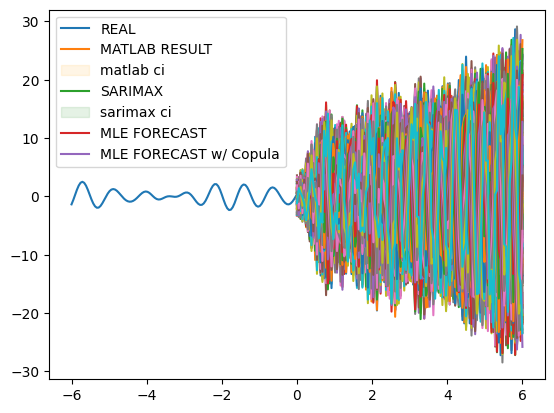

In [37]:
fig, ax = plt.subplots()
ax.plot(np.linspace(-6,6,250),y_graph1)
ax.plot(np.linspace(0,6,125),matlab_result1)
ax.fill_between(np.linspace(0,6,125), matlab_ci_up1, matlab_ci_down1, color='orange', alpha=.1)

ax.plot(np.linspace(0,6,125),sarimax_res1.forecast(125))
ax.fill_between(np.linspace(0,6,125), sarimax_ci_up1, sarimax_ci_down1, color='green', alpha=.1)

plt.plot(np.linspace(0,6,125),forecast_param1)
plt.plot(np.linspace(0,6,125),forecast1_param_copula)

for i in range(repeats):
    plt.plot(np.linspace(0,6,125),B[i, :])

plt.legend([ "REAL", "MATLAB RESULT", "matlab ci","SARIMAX", "sarimax ci",  "MLE FORECAST", "MLE FORECAST w/ Copula"])

plt.show()

In [38]:
for i in range(125):
    print(max(B[:,i]) , min(B[:,i]) , max(B[:,i])  - min(B[:,i]) )

3.613557495239902 -3.278474948544152 6.892032443784053
3.293957936354171 -3.5470961020451597 6.841054038399331
4.511353367137409 -3.84592756335149 8.3572809304889
4.687116063991197 -4.336791434349149 9.023907498340346
4.473989318080777 -3.7371895294750583 8.211178847555836
6.543256082154888 -5.282737529115724 11.825993611270611
7.752324873555069 -6.113093060724221 13.86541793427929
7.36860038467982 -7.704734714349796 15.073335099029617
9.5035442447722 -9.348297317861869 18.85184156263407
7.948959419676388 -7.182508114904712 15.1314675345811
10.236119067734407 -10.891713571852948 21.127832639587353
12.361678702896775 -13.26792864690021 25.629607349796984
11.6986654256555 -11.259069926284 22.9577353519395
13.392999234488716 -13.557133663565676 26.95013289805439
13.717599126140676 -14.658239046746786 28.375838172887462
13.60687714678915 -14.005088266993068 27.61196541378222
16.123892385370695 -16.92443556614686 33.04832795151756
14.2005083434433 -15.933026096156919 30.13353443960022
14.73

In [39]:
y_test2 = pd.read_csv("heave_filter_test.csv", header = None)
y_test2 = y_test2[0]
matlab_result2 = pd.read_csv("heave_matlabresult.csv", header = None)
matlab_ci_up2 = pd.read_csv("heave_matlabresult_up_ci.csv", header = None)
matlab_ci_down2 = pd.read_csv("heave_matlabresult_down_ci.csv", header = None)

matlab_ci_up2 = np.array(matlab_ci_up2).flatten()
matlab_ci_down2 = np.array(matlab_ci_down2).flatten()

y_graph2 = list(y2[-125:3000])
print(len(y_graph2), len(y_test2))
y_graph2 = y_graph2 + list(y_test2)

sarimax_ci_down2 = sarimax_res2.get_forecast(125).summary_frame()["mean_ci_lower"]
sarimax_ci_up2 = sarimax_res2.get_forecast(125).summary_frame()["mean_ci_upper"]

125 125


In [40]:
B2 = pd.DataFrame(pi_2)
B2.head()

B2 = B2.to_numpy()
B2.shape

(125, 125)

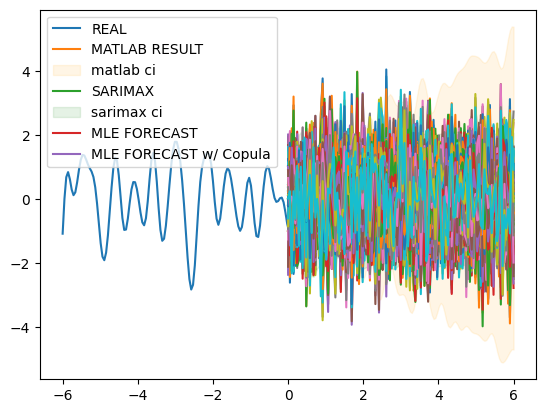

In [41]:
fig, ax = plt.subplots()
ax.plot(np.linspace(-6,6,250),y_graph2)
ax.plot(np.linspace(0,6,125),matlab_result2)
ax.fill_between(np.linspace(0,6,125), matlab_ci_up2, matlab_ci_down2, color='orange', alpha=.1)

ax.plot(np.linspace(0,6,125),sarimax_res2.forecast(125))
ax.fill_between(np.linspace(0,6,125), sarimax_ci_up2, sarimax_ci_down2, color='green', alpha=.1)

plt.plot(np.linspace(0,6,125),forecast_param2)
plt.plot(np.linspace(0,6,125),forecast2_param_copula)

for i in range(repeats):
    plt.plot(np.linspace(0,6,125),B2[i, :])

plt.legend([ "REAL", "MATLAB RESULT", "matlab ci","SARIMAX", "sarimax ci",  "MLE FORECAST", "MLE FORECAST w/ Copula"])

plt.show()

In [ ]:
for i in range(125):
    print(max(B2[:,i]) , min(B2[:,i]) , max(B2[:,i])  - min(B2[:,i]) )

-1.0028676977591864 -1.0096567180998821 0.006789020340695728
-0.964910255158117 -0.9717148040511959 0.00680454889307891
-0.6200486675480822 -0.6261662035242737 0.006117535976191468
-0.05582216736568742 -0.061518887694700916 0.005696720329013499
0.5558878539051916 0.5497484957159676 0.0061393581892239535
1.0377174043324324 1.0292756578106876 0.008441746521744786
1.2679011821240833 1.261078112598242 0.00682306952584133
1.2201370524012853 1.21409064455998 0.00604640784130539
0.9439777495067253 0.9379537988043342 0.006023950702391145
0.5402073261470415 0.5330271132946435 0.007180212852398005
0.1115249197748003 0.10511602047062328 0.006408899304177013
-0.25813826643505644 -0.2634016516274535 0.005263385192397052
-0.5189534068022588 -0.5251996429585185 0.0062462361562597435
-0.6539983894057976 -0.6615307561550079 0.0075323667492103175
-0.6707931554602463 -0.6763928708000911 0.005599715339844824
-0.5891537658277506 -0.5948937346469056 0.005739968819155061
-0.4528281187813397 -0.45896802271131

In [ ]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
#taken from moving the sarimax coefficients back to unrestricted , + 0.2 for std
#param_i =  [1.43062821, -1.94276257,  1.35640481, -1.57238812,  1.14566874,
#       -1.36300256,  0.975811  , -1.08354372,  0.63201633, -0.11086265,
#       -0.58308458,  0.21181589,  0.20883829, -0.42056699, -0.23902717,
#        0.27819564,  0.03125508, -0.36669473, -0.13662484,  0.17131567,
#        0.00464366, -0.2815075 , -0.14619721,  0.11172431,  0.05041669,
#       -0.24400596, -0.18424333,  0.06357809,  0.07072182, -0.1744426 , sq_to_sigma2(1.875e-06)] 
#param_i = [0.1 for i in range(p+1)]

In [ ]:
#taken from moving the sarimax coefficients back to unrestricted , + for std
#param_i = [ 1.56965118e+00, -1.10318347e+00, -1.12617173e+00, -4.70611997e-01,
#        3.80981831e-01,  3.88608873e-01, -3.32232845e-02, -3.57933395e-01,
#       -3.84396232e-01, -2.13913111e-01, -3.32032316e-02,  7.27807189e-02,
#        1.35271260e-01,  1.44705874e-01,  6.34294712e-02, -6.24765013e-02,
#       -1.31893959e-01, -9.58347840e-02,  2.59784555e-03,  7.94090593e-02,
#        7.95718258e-02, -1.49383384e-03, -1.08015108e-01, -1.54686481e-01,
#       -9.90133545e-02,  1.58781329e-03,  7.33577218e-02,  9.06543806e-02,
#        6.05715901e-02, -1.69628908e-03, -6.43888539e-02, -8.77574244e-02,
#       -5.41209350e-02,  1.85541015e-02,  8.30302325e-02,  9.84742593e-02,
#        7.09224434e-02,  2.88240154e-02, -3.78701700e-02, -1.86790251e-01, sq_to_sigma2(0.0015)]
#param_i = [0.1 for i in range(p+1)]

In [ ]:
from copulas.bivariate import Bivariate #instantiates children classes as soon as called the first time
copula = Bivariate(random_state=1)
copula.select_copula(data)
#also uses empirical to select copulas 

Gumbel pdf


C = exp(-(sum(-log(u_i))^theta)^(1/theta))

theta [1,infinity)

\begin{align}
    c(U,V)
        &= \frac{\partial^2 C(u,v)}{\partial v \partial u}
        &= \frac{C(u,v)}{uv} \frac{((-\ln u)^{\theta}  
        + (-\ln v)^{\theta})^{\frac{2}      {\theta} - 2 }}{(\ln u \ln v)^{1 - \theta}}  
    ( 1 + (\theta-1) \big((-\ln u)^\theta
    + (-\ln v)^\theta\big)^{-1/\theta})
\end{align}

In [ ]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
#generated data from r 
y_sim= pd.read_csv("gumbel_norm_norm_data.csv")
y_sim = y_sim[["V1", "V2"]]
y1t_sim = y_sim["V1"]
y2t_sim = y_sim["V2"]

y_sim = y_sim.to_numpy()

In [ ]:
cop = copulae.archimedean.GumbelCopula() #dim = 2 == default
cop.fit(y_sim)
print(cop.summary())

Gumbel Copula Summary
Gumbel Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.5122081541043857



In [ ]:
# Transform to uniform marginals
U_1t_sim = stats.norm.cdf(y1t_sim)
U_2t_sim = stats.norm.cdf(y2t_sim)
U_1t_sim, U_2t_sim

data_sim = pd.DataFrame(U_1t_sim, columns = ["U_1t_sim"])
data_sim["U_2t_sim"] = U_2t_sim
data_sim = data_sim.to_numpy()

In [ ]:
#requires marginal data 

from copulas.bivariate import Gumbel
copula = Gumbel()
copula.fit(data_sim)
copula.compute_theta()
copula.tau
copula.theta

1.6261498028909331

In [ ]:
from statsmodels.distributions.copula.api import GumbelCopula
cop = GumbelCopula()
cop.fit_corr_param(data_sim)

1.6261498028909331

In [ ]:
#my fn 

def theta_to_exp(theta):
    return math.exp(theta)

def exp_to_theta(exp):
    return math.log(exp)

def neg_log_gumbel_pdf(theta, u, v):
    print(theta)
    #theta = theta_to_exp(theta)

    #from copulas
    a = np.power(u * v, -1)
    tmp = np.power(-np.log(u), theta) + np.power(-np.log(v), theta)
    b = np.power(tmp, -2 + 2.0 / theta)
    c = np.power(np.log(u) * np.log(v), theta - 1)
    d = 1 + (theta - 1) * np.power(tmp, -1.0 / theta)
    #cdf = np.exp(- (( -np.log(u))**theta + (-np.log(v))**theta )**(1/theta))
    
    h = np.power(-np.log(u), theta) + np.power(-np.log(v), theta)
    h = -np.power(h, 1.0 / theta)
    cdf = np.exp(h)
    return -1 * np.log ( np.sum( cdf * a * b * c * d))

In [ ]:
#from copulae

def ipsi(theta, u, log=False):
    v = (-np.log(u)) ** theta
    return np.log(v) if log else v

def neg_log_gumbel_pdf(theta, u, v):
    print(theta)
    #theta = theta_to_exp(theta)

    nlu = -np.log(u)  # negative log u
    lnlu = np.log(nlu)  # log negative log u
    lip = ipsi(theta, u, log=True)  # log ipsi u
    
    offset = np.max(u, axis=1)
    ln = offset + np.log(np.exp(lip - offset[:, None]).sum(1))

    d = 2
    alpha = 1 / theta
    lx = alpha * ln
    ls = gumbel_poly(lx, alpha, d, log=True) - d * lx / alpha
    lnc = -np.exp(lx)
    log_pdf = lnc + d * np.log(theta) + ((theta - 1) * lnlu + nlu).sum(1) + ls
    return log_pdf

In [ ]:
#pseudo obs

from scipy.stats import rankdata
rd1 = rankdata(data_sim[:,0])/101 
rd2 = rankdata(data_sim[:,1])/101 

In [ ]:
results = minimize(neg_log_gumbel_pdf, [0.1], args = ((rd1, rd2)), method = "nelder-mead") #, options= {'maxiter': 20000, 'disp': False, 'xatol': 0.0001, 'fatol': 0.0001})
results
#theta_to_exp(results.x)

[0.1]


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
y1t = pd.read_csv("rollpred_postfilter.csv")
y1t = y1t["x"]
y2t = pd.read_csv("heave_postfilter.csv", header = None)
y2t = y2t[0]


y = pd.DataFrame({"y1t":y1t})
y["y2t"] = y2t
y = y.to_numpy()
y

: 

In [ ]:
# Transform to uniform marginals
U_1t = stats.norm.cdf(y1t)
U_2t = stats.norm.cdf(y2t)
U_1t, U_2t

data = pd.DataFrame(U_1t, columns = ["U_1t"])
data["U_2t"] = U_2t
#data = pd.DataFrame(U_1t, U_2t, columns = ["U_1t", "U_2t"])
data = data.to_numpy()
data

: 

In [ ]:
cop = copulae.archimedean.GumbelCopula() #dim = 2 == default
cop.fit(y)
print(cop.summary())


: 

In [ ]:
from copulas.bivariate import Gumbel
copula = Gumbel()
copula.fit(data)
copula.compute_theta()
copula.tau
copula.theta

: 

In [ ]:
from statsmodels.distributions.copula.api import GumbelCopula
cop = GumbelCopula()
cop.fit_corr_param(data)

: 